## pandas

In [208]:
import pandas as pd

In [289]:
ds = pd.read_csv('data/Food_Time new.csv')

In [210]:
ds.head()

Traffic_Level    ID Delivery_person_ID weather_description Type_of_order   
0          High  70A2     CHENRES12DEL01                mist         Snack  \
1          High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2          High  CDCD      DEHRES17DEL01           clear sky         Snack   
3          High  2784     PUNERES13DEL03           clear sky        Drinks   
4          High  6F67      HYDRES14DEL01     overcast clouds         Snack   

  Type_of_vehicle  Delivery_person_Age  Delivery_person_Ratings   
0         scooter                   32                      4.6  \
1         scooter                   33                      4.7   
2      motorcycle                   36                      4.2   
3         scooter                   23                      4.7   
4      motorcycle                   34                      4.9   

  Restaurant_latitude Restaurant_longitude Delivery_location_latitude   
0          12.972.793           80.249.982                 13.012.793  \
1          23.369.746            8.533.982                 23.479.746   
2          30.327.968           78.046.106                 30.397.968   
3           1.856.245           73.916.619                  1.865.245   
4          17.426.228           78.407.495                 17.496.228   

  Delivery_location_longitude  temperature  humidity  precipitation   
0                  80.289.982        26.55      87.0            0.0  \
1                   8.544.982        17.51      69.0            0.0   
2                  78.116.106        12.44      77.0            0.0   
3                  74.006.619        19.37      65.0            0.0   
4                  78.477.495        21.29      64.0            0.0   

   Distance (km)         TARGET  
0           9.89          43.45  
1          19.11  3.816.666.667  
2          11.59  3.636.666.667  
3          21.93          49.45  
4          18.26  5.248.333.333

In [211]:
ds.shape

(10000, 17)

In [212]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [213]:
ds.columns

Index(['Traffic_Level', 'ID', 'Delivery_person_ID', 'weather_description',
       'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET'],
      dtype='object')

In [214]:
num_cols = ['temperature', 'humidity','precipitation', 'Distance (km)', 'Delivery_person_Age']
cat_cols = ['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Ratings']

# I am not sure where to put those
id_cols = ['ID', 'Delivery_person_ID',]
coord_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
target_cols = ['TARGET']

len(num_cols) + len(cat_cols) + len(coord_cols) + len(id_cols) + len(target_cols)

17

### Delivery_person_Ratings

тут в 'Delivery_person_Ratings' значення ніби і float64 але так то дискретні: не можна поставити 4.75 зірок, найменший крок 0.1.
то я подумав шо можна дискретизувати його в проміжки [1, 2), [2, 3) ... [5, 6]

In [215]:
sorted(ds['Delivery_person_Ratings'].unique())

[1.0,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 6.0]

In [216]:
# свіснув код з якогось сайтика
def frange (start,end,step):
	if step == 0 : raise ValueError("frange() step argument must not be zero")
	if (end-start)/step <= 0: step = -step
	while abs(start) <= abs(end):
		yield start
		start += step

In [217]:
rating_min, rating_max, rating_step = 1, 6, 0.5

rating_map = {}
for i in frange(rating_min, rating_max, rating_step):
  rating_map[(i, i+rating_step)] = []
rating_map
  

{(1, 1.5): [],
 (1.5, 2.0): [],
 (2.0, 2.5): [],
 (2.5, 3.0): [],
 (3.0, 3.5): [],
 (3.5, 4.0): [],
 (4.0, 4.5): [],
 (4.5, 5.0): [],
 (5.0, 5.5): [],
 (5.5, 6.0): [],
 (6.0, 6.5): []}

In [218]:
for i, value in ds['Delivery_person_Ratings'].items():
  
  for value_range in rating_map.keys():
    lim_a, lim_b = value_range
    
    value = float(value)
    
    if value >= lim_a and value < lim_b:
      rating_map[value_range].append(value)
#rating_map

ця мапа зберігає всі значення які попали в її проміжок

In [219]:
sum([len(value_list) for value_list in rating_map.values()])

10000

In [220]:
for key, value in rating_map.items():
  rating_map[key] = len(value)
rating_map

{(1, 1.5): 5,
 (1.5, 2.0): 0,
 (2.0, 2.5): 0,
 (2.5, 3.0): 23,
 (3.0, 3.5): 29,
 (3.5, 4.0): 238,
 (4.0, 4.5): 1534,
 (4.5, 5.0): 7331,
 (5.0, 5.5): 830,
 (5.5, 6.0): 0,
 (6.0, 6.5): 10}

In [221]:
ratings_ranges_df = pd.DataFrame({
  'ranges': rating_map.keys(),
  'amount': rating_map.values(),
})
ratings_ranges_df

ranges  amount
0     (1, 1.5)       5
1   (1.5, 2.0)       0
2   (2.0, 2.5)       0
3   (2.5, 3.0)      23
4   (3.0, 3.5)      29
5   (3.5, 4.0)     238
6   (4.0, 4.5)    1534
7   (4.5, 5.0)    7331
8   (5.0, 5.5)     830
9   (5.5, 6.0)       0
10  (6.0, 6.5)      10

в нас дуже незрівноважена змінна, треба думать шо робить.

там знизу на графіку видно шо скачки в даних десь по 0.5 тому розбив дискретизацію по 0.5. нашо? я подумав шо можна не робити всіх окремі класи onehot'ом, а зробити шось типу [1, 3.5), [3.5, 4.5), [4.5, 5.0), [5.0, 6.5) шоб не робити дуже розріджену матрицю

<Axes: >

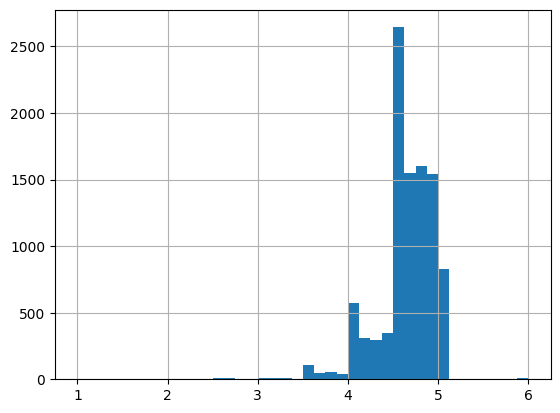

In [222]:
ds['Delivery_person_Ratings'].hist(bins=40)

In [223]:
rating_str_f = lambda lim_a, lim_b: f"Delivery-Person Rating [{lim_a}, {lim_b})"
ds_new_rating = ds.copy()

rating_discrete = [(1, 3.5), (3.5, 4.5), (4.5, 5.0), (5.0, 6.5)]

for lim_a, lim_b in rating_discrete:
  ds_new_rating[rating_str_f(lim_a, lim_b)] = np.zeros(ds.shape[0])

# we use the old 'clean' ds to iterate through but make changes in the new one
for i, value in ds['Delivery_person_Ratings'].items():
  
  for value_range in rating_discrete:
    lim_a, lim_b = value_range
    
    value = float(value)
    
    if value >= lim_a and value < lim_b:
      ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1


C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds

In [225]:
ds_new_rating = ds_new_rating.drop('Delivery_person_Ratings', axis=1)
ds_new_rating

Traffic_Level    ID Delivery_person_ID weather_description Type_of_order   
0             High  70A2     CHENRES12DEL01                mist         Snack  \
1             High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2             High  CDCD      DEHRES17DEL01           clear sky         Snack   
3             High  2784     PUNERES13DEL03           clear sky        Drinks   
4             High  6F67      HYDRES14DEL01     overcast clouds         Snack   
...            ...   ...                ...                 ...           ...   
9995      Very Low  1939      HYDRES05DEL01                haze        Buffet   
9996      Very Low  1B05      SURRES14DEL01                mist        Drinks   
9997      Very Low  74AB      SURRES05DEL01                mist        Drinks   
9998      Very Low  5F66      SURRES02DEL02                mist         Snack   
9999      Very Low  1F95      MYSRES01DEL01           clear sky         Snack   

       Type_of_vehicle  Delivery_person_Age Restaurant_latitude   
0              scooter                   32          12.972.793  \
1              scooter                   33          23.369.746   
2           motorcycle                   36          30.327.968   
3              scooter                   23           1.856.245   
4           motorcycle                   34          17.426.228   
...                ...                  ...                 ...   
9995        motorcycle                   28          17.433.809   
9996  electric_scooter                   26          21.157.729   
9997           scooter                   32          21.175.104   
9998           scooter                   31          21.186.608   
9999        motorcycle                   34          12.311.072   

     Restaurant_longitude Delivery_location_latitude   
0              80.249.982                 13.012.793  \
1               8.533.982                 23.479.746   
2              78.046.106                 30.397.968   
3              73.916.619                  1.865.245   
4              78.407.495                 17.496.228   
...                   ...                        ...   
9995           78.386.744                 17.443.809   
9996           72.768.726                 21.167.729   
9997           72.804.342                 21.185.104   
9998           72.794.136                 21.206.608   
9999           76.654.878                 12.321.072   

     Delivery_location_longitude  temperature  humidity  precipitation   
0                     80.289.982        26.55      87.0            0.0  \
1                      8.544.982        17.51      69.0            0.0   
2                     78.116.106        12.44      77.0            0.0   
3                     74.006.619        19.37      65.0            0.0   
4                     78.477.495        21.29      64.0            0.0   
...                          ...          ...       ...            ...   
9995                  78.396.744        22.61      60.0            0.0   
9996                  72.778.726        24.98      73.0            0.0   
9997                  72.814.342        24.99      73.0            0.0   
9998                  72.814.136        25.01      73.0            0.0   
9999                  76.664.878        19.82      68.0            0.0   

      Distance (km)         TARGET  Delivery-Person Rating [1, 3.5)   
0              9.89          43.45                              0.0  \
1             19.11  3.816.666.667                              0.0   
2             11.59  3.636.666.667                              0.0   
3             21.93          49.45                              0.0   
4             18.26  5.248.333.333                              0.0   
...             ...            ...                              ...   
9995           2.52  1.246.666.667                              0.0   
9996           2.41           20.7                              0.0   
9997           2.77       

тож я потратив 2 години, шоб почистити одну змінну...

## target

In [227]:
ds_new_target = ds.copy()

In [228]:
# chat wrote this
import math

def convert_to_float(s) -> float:
    if not isinstance(s, str):
        return math.nan  # Return NaN for non-string input
    
    parts = s.split('.')
    if len(parts) > 2:
        s = parts[0] + '.' + ''.join(parts[1:])  # Fix multiple dots
    
    try:
        return float(s)
    except ValueError:
        return math.nan  # Return NaN for invalid float conversion

In [229]:
ds_new_target['TARGET'] = ds_new_target['TARGET'].apply(lambda x: convert_to_float(x))

<Axes: >

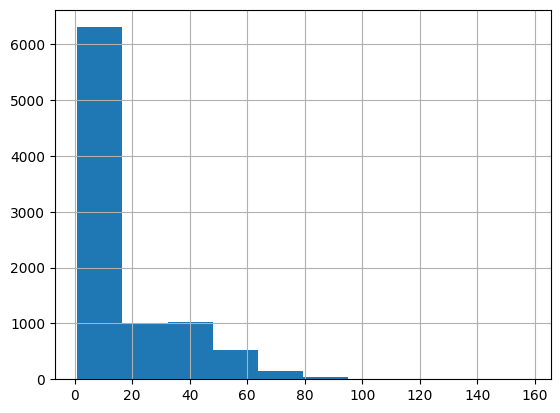

In [230]:
ds_new_target['TARGET'].hist()

господи, бо я вже хто зна шо за ті дані подумав...

In [231]:
ds_new_target[ds_new_target['TARGET'].isna()].count().sort_values()

TARGET                           0
Distance (km)                   45
Traffic_Level                   45
weather_description            955
temperature                    955
humidity                       955
precipitation                  955
Type_of_order                  960
Type_of_vehicle                960
Delivery_person_Age            960
Delivery_person_Ratings        960
ID                             960
Restaurant_longitude           960
Delivery_location_latitude     960
Delivery_location_longitude    960
Delivery_person_ID             960
Restaurant_latitude            960
dtype: int64

видаляти під 1000 записів обіда-боль, але там ж цільова змінна відсутня... можна буде загуглить, може вумні дяді-тьоті, шось там придумали

In [232]:
ds_new_target = ds_new_target.dropna(subset=['TARGET'])

In [233]:
ds_new_target

Traffic_Level    ID Delivery_person_ID weather_description Type_of_order   
0             High  70A2     CHENRES12DEL01                mist         Snack  \
1             High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2             High  CDCD      DEHRES17DEL01           clear sky         Snack   
3             High  2784     PUNERES13DEL03           clear sky        Drinks   
4             High  6F67      HYDRES14DEL01     overcast clouds         Snack   
...            ...   ...                ...                 ...           ...   
9995      Very Low  1939      HYDRES05DEL01                haze        Buffet   
9996      Very Low  1B05      SURRES14DEL01                mist        Drinks   
9997      Very Low  74AB      SURRES05DEL01                mist        Drinks   
9998      Very Low  5F66      SURRES02DEL02                mist         Snack   
9999      Very Low  1F95      MYSRES01DEL01           clear sky         Snack   

       Type_of_vehicle  Delivery_person_Age  Delivery_person_Ratings   
0              scooter                   32                      4.6  \
1              scooter                   33                      4.7   
2           motorcycle                   36                      4.2   
3              scooter                   23                      4.7   
4           motorcycle                   34                      4.9   
...                ...                  ...                      ...   
9995        motorcycle                   28                      4.8   
9996  electric_scooter                   26                      4.7   
9997           scooter                   32                      4.7   
9998           scooter                   31                      4.1   
9999        motorcycle                   34                      4.2   

     Restaurant_latitude Restaurant_longitude Delivery_location_latitude   
0             12.972.793           80.249.982                 13.012.793  \
1             23.369.746            8.533.982                 23.479.746   
2             30.327.968           78.046.106                 30.397.968   
3              1.856.245           73.916.619                  1.865.245   
4             17.426.228           78.407.495                 17.496.228   
...                  ...                  ...                        ...   
9995          17.433.809           78.386.744                 17.443.809   
9996          21.157.729           72.768.726                 21.167.729   
9997          21.175.104           72.804.342                 21.185.104   
9998          21.186.608           72.794.136                 21.206.608   
9999          12.311.072           76.654.878                 12.321.072   

     Delivery_location_longitude  temperature  humidity  precipitation   
0                     80.289.982        26.55      87.0            0.0  \
1                      8.544.982        17.51      69.0            0.0   
2                     78.116.106        12.44      77.0            0.0   
3                     74.006.619        19.37      65.0            0.0   
4                     78.477.495        21.29      64.0            0.0   
...                          ...          ...       ...            ...   
9995                  78.396.744        22.61      60.0            0.0   
9996                  72.778.726        24.98      73.0            0.0   
9997                  72.814.342        24.99      73.0            0.0   
9998                  72.814.136        25.01      73.0            0.0   
9999                  76.664.878        19.82      68.0            0.0   

      Distance (km)     TARGET  
0              9.89  43.450000  
1             19.11   3.816667  
2             11.59   3.636667  
3             21.93  49.450000  
4             18.26   5.248333  
...             ...        ...  
9995           2.52   1.246667  
9996           2.41  20.700000  
9997           2.77  20.250000  
9998           3.42  15.800000  
99

## IDS

there are two ID cols. I propose droping both of them as their value does not correspond to the TARGET

In [234]:
ds_new_ids = ds.copy()

In [235]:
ds_new_ids = ds_new_ids.drop(['ID', 'Delivery_person_ID'], axis=1)

In [236]:
ds_new_ids.head()

Traffic_Level weather_description Type_of_order Type_of_vehicle   
0          High                mist         Snack         scooter  \
1          High           clear sky          Meal         scooter   
2          High           clear sky         Snack      motorcycle   
3          High           clear sky        Drinks         scooter   
4          High     overcast clouds         Snack      motorcycle   

   Delivery_person_Age  Delivery_person_Ratings Restaurant_latitude   
0                   32                      4.6          12.972.793  \
1                   33                      4.7          23.369.746   
2                   36                      4.2          30.327.968   
3                   23                      4.7           1.856.245   
4                   34                      4.9          17.426.228   

  Restaurant_longitude Delivery_location_latitude Delivery_location_longitude   
0           80.249.982                 13.012.793                  80.289.982  \
1            8.533.982                 23.479.746                   8.544.982   
2           78.046.106                 30.397.968                  78.116.106   
3           73.916.619                  1.865.245                  74.006.619   
4           78.407.495                 17.496.228                  78.477.495   

   temperature  humidity  precipitation  Distance (km)         TARGET  
0        26.55      87.0            0.0           9.89          43.45  
1        17.51      69.0            0.0          19.11  3.816.666.667  
2        12.44      77.0            0.0          11.59  3.636.666.667  
3        19.37      65.0            0.0          21.93          49.45  
4        21.29      64.0            0.0          18.26  5.248.333.333

## LATITUDE AND LONGITUDE

In [237]:
# the chatgpt written code
import pandas as pd

def fix_coordinates(coord):
    """
    Convert incorrectly formatted coordinates (with '.' as thousand separators) into floats.
    Validates input to handle NaN values and ensure it's a string.

    Example:
    "13.012.793" -> 13.012793
    "80.289.982" -> 80.289982
    """
    if pd.isna(coord) or not isinstance(coord, str):
        return None  # Return None for NaN values or non-string inputs

    parts = coord.split(".")
    if len(parts) > 2:
        return float(parts[0] + "." + "".join(parts[1:]))
    return float(coord)  # Handle cases where no correction is needed

In [238]:
ds_new_coord = ds.copy()

In [240]:
for coord_col in coord_cols:
  ds_new_coord[coord_col] = ds_new_coord[coord_col].apply(lambda row_value: fix_coordinates(row_value))

In [242]:
ds_new_coord.head()

Traffic_Level    ID Delivery_person_ID weather_description Type_of_order   
0          High  70A2     CHENRES12DEL01                mist         Snack  \
1          High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2          High  CDCD      DEHRES17DEL01           clear sky         Snack   
3          High  2784     PUNERES13DEL03           clear sky        Drinks   
4          High  6F67      HYDRES14DEL01     overcast clouds         Snack   

  Type_of_vehicle  Delivery_person_Age  Delivery_person_Ratings   
0         scooter                   32                      4.6  \
1         scooter                   33                      4.7   
2      motorcycle                   36                      4.2   
3         scooter                   23                      4.7   
4      motorcycle                   34                      4.9   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude   
0            12.972793             80.249982                   13.012793  \
1            23.369746              8.533982                   23.479746   
2            30.327968             78.046106                   30.397968   
3             1.856245             73.916619                    1.865245   
4            17.426228             78.407495                   17.496228   

   Delivery_location_longitude  temperature  humidity  precipitation   
0                    80.289982        26.55      87.0            0.0  \
1                     8.544982        17.51      69.0            0.0   
2                    78.116106        12.44      77.0            0.0   
3                    74.006619        19.37      65.0            0.0   
4                    78.477495        21.29      64.0            0.0   

   Distance (km)         TARGET  
0           9.89          43.45  
1          19.11  3.816.666.667  
2          11.59  3.636.666.667  
3          21.93          49.45  
4          18.26  5.248.333.333

## categoricals

In [268]:
cat_cols = ['Traffic_Level','weather_description','Type_of_order','Type_of_vehicle']
cat_cols

['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle']

In [294]:
ds[cat_cols]

Traffic_Level weather_description Type_of_order   Type_of_vehicle
0               3.0                mist         Snack           scooter
1               3.0           clear sky          Meal           scooter
2               3.0           clear sky         Snack        motorcycle
3               3.0           clear sky        Drinks           scooter
4               3.0     overcast clouds         Snack        motorcycle
...             ...                 ...           ...               ...
9995            0.0                haze        Buffet        motorcycle
9996            0.0                mist        Drinks  electric_scooter
9997            0.0                mist        Drinks           scooter
9998            0.0                mist         Snack           scooter
9999            0.0           clear sky         Snack        motorcycle

[10000 rows x 4 columns]

In [293]:
ds['Traffic_Level'].value_counts()

Traffic_Level
3.0    2736
2.0    2219
4.0    1772
1.0    1726
0.0     632
Name: count, dtype: int64

ЛЕКЦІЇ - 
1. ONE-HOT encoding •Погана підтримка для деяких моделей: Лінійні моделі та нейронні
мережі можуть неефективно працювати з бінарними ознаками.
2. Порядкова заміна •Проблема з нелінійними моделями: Лінійні моделі можуть
неправильно інтерпретувати порядкові коди як абсолютні відстані

from chatgpt:

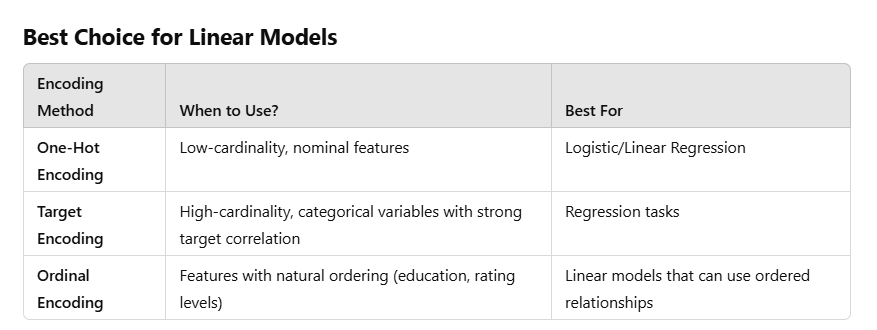

In [292]:
traffic_level_map = {
  'Very High': 4,
  'High': 3,
  'Moderate': 2,
  'Low': 1,
  'Very Low': 0,
}
ds['Traffic_Level'] = ds['Traffic_Level'].map(traffic_level_map)

In [295]:
ds['weather_description'].value_counts()

weather_description
clear sky           3260
haze                2406
mist                1751
broken clouds        721
light rain           536
smoke                501
scattered clouds     422
overcast clouds      308
fog                   49
few clouds            40
moderate rain          1
Name: count, dtype: int64

я спитав в чату: тут погоду не можна подати як ordinal категорії, але можна замінити їх наприклад на видимість і вже тоді впорядкувати

In [ ]:
weather_order_visibility = {
    "clear sky": 11,
    "few clouds": 10,
    "scattered clouds": 9,
    "broken clouds": 8,
    "overcast clouds": 7,
    "haze": 6,
    "mist": 5,
    "fog": 4,
    "smoke": 3,
    "light rain": 2,
    "moderate rain": 1
}
ds['Weather Visibility'] = ds['weather_description'].map(weather_order_visibility)
ds = ds.drop('weather_description', axis=1)

In [303]:
ds.head()

Traffic_Level    ID Delivery_person_ID Type_of_order Type_of_vehicle   
0            3.0  70A2     CHENRES12DEL01         Snack         scooter  \
1            3.0  95B4   RANCHIRES15DEL01          Meal         scooter   
2            3.0  CDCD      DEHRES17DEL01         Snack      motorcycle   
3            3.0  2784     PUNERES13DEL03        Drinks         scooter   
4            3.0  6F67      HYDRES14DEL01         Snack      motorcycle   

   Delivery_person_Age  Delivery_person_Ratings Restaurant_latitude   
0                   32                      4.6          12.972.793  \
1                   33                      4.7          23.369.746   
2                   36                      4.2          30.327.968   
3                   23                      4.7           1.856.245   
4                   34                      4.9          17.426.228   

  Restaurant_longitude Delivery_location_latitude Delivery_location_longitude   
0           80.249.982                 13.012.793                  80.289.982  \
1            8.533.982                 23.479.746                   8.544.982   
2           78.046.106                 30.397.968                  78.116.106   
3           73.916.619                  1.865.245                  74.006.619   
4           78.407.495                 17.496.228                  78.477.495   

   temperature  humidity  precipitation  Distance (km)         TARGET   
0        26.55      87.0            0.0           9.89          43.45  \
1        17.51      69.0            0.0          19.11  3.816.666.667   
2        12.44      77.0            0.0          11.59  3.636.666.667   
3        19.37      65.0            0.0          21.93          49.45   
4        21.29      64.0            0.0          18.26  5.248.333.333   

   Weather Visibility  
0                 5.0  
1                11.0  
2                11.0  
3                11.0  
4                 7.0

In [309]:
ds['Type_of_order'].value_counts()

Type_of_order
Snack     2551
Meal      2530
Drinks    2507
Buffet    2412
Name: count, dtype: int64

тут тільки чотири типи, небагато. і порядку в них нема, тому можна за one-hot зробити. target не підійде бо вони плюс-мінус однаково розподілені

In [311]:
ds = pd.get_dummies(ds, columns=['Type_of_order'], drop_first=True)

In [313]:
ds.head()

Traffic_Level    ID Delivery_person_ID Type_of_vehicle   
0            3.0  70A2     CHENRES12DEL01         scooter  \
1            3.0  95B4   RANCHIRES15DEL01         scooter   
2            3.0  CDCD      DEHRES17DEL01      motorcycle   
3            3.0  2784     PUNERES13DEL03         scooter   
4            3.0  6F67      HYDRES14DEL01      motorcycle   

   Delivery_person_Age  Delivery_person_Ratings Restaurant_latitude   
0                   32                      4.6          12.972.793  \
1                   33                      4.7          23.369.746   
2                   36                      4.2          30.327.968   
3                   23                      4.7           1.856.245   
4                   34                      4.9          17.426.228   

  Restaurant_longitude Delivery_location_latitude Delivery_location_longitude   
0           80.249.982                 13.012.793                  80.289.982  \
1            8.533.982                 23.479.746                   8.544.982   
2           78.046.106                 30.397.968                  78.116.106   
3           73.916.619                  1.865.245                  74.006.619   
4           78.407.495                 17.496.228                  78.477.495   

   temperature  humidity  precipitation  Distance (km)         TARGET   
0        26.55      87.0            0.0           9.89          43.45  \
1        17.51      69.0            0.0          19.11  3.816.666.667   
2        12.44      77.0            0.0          11.59  3.636.666.667   
3        19.37      65.0            0.0          21.93          49.45   
4        21.29      64.0            0.0          18.26  5.248.333.333   

   Weather Visibility  Type_of_order_Drinks  Type_of_order_Meal   
0                 5.0                 False               False  \
1                11.0                 False                True   
2                11.0                 False               False   
3                11.0                  True               False   
4                 7.0                 False               False   

   Type_of_order_Snack  
0                 True  
1                False  
2                 True  
3                False  
4                 True

In [325]:
cat_cols = [
  'Traffic_Level',
  'Weather Visibility',
  'Type_of_order_Drinks',
  'Type_of_order_Meal',
  'Type_of_order_Snack',
  'Type_of_vehicle_electric_scooter',
  'Type_of_vehicle_motorcycle',
  'Type_of_vehicle_scooter',
]
ds[cat_cols]

Traffic_Level  Weather Visibility  Type_of_order_Drinks   
0               3.0                 5.0                 False  \
1               3.0                11.0                 False   
2               3.0                11.0                 False   
3               3.0                11.0                  True   
4               3.0                 7.0                 False   
...             ...                 ...                   ...   
9995            0.0                 6.0                 False   
9996            0.0                 5.0                  True   
9997            0.0                 5.0                  True   
9998            0.0                 5.0                 False   
9999            0.0                11.0                 False   

      Type_of_order_Meal  Type_of_order_Snack   
0                  False                 True  \
1                   True                False   
2                  False                 True   
3                  False                False   
4                  False                 True   
...                  ...                  ...   
9995               False                False   
9996               False                False   
9997               False                False   
9998               False                 True   
9999               False                 True   

      Type_of_vehicle_electric_scooter  Type_of_vehicle_motorcycle   
0                                False                       False  \
1                                False                       False   
2                                False                        True   
3                                False                       False   
4                                False                        True   
...                                ...                         ...   
9995                             False                        True   
9996                              True                       False   
9997                             False                       False   
9998                             False                       False   
9999                             False                        True   

      Type_of_vehicle_scooter  
0                        True  
1                        True  
2                       False  
3                        True  
4                       False  
...                       ...  
9995                    False  
9996                    False  
9997                     True  
9998                     True  
9999                    False  

[10000 rows x 8 columns]

In [322]:
ds['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          5862
scooter             3304
electric_scooter     814
bicycle               20
Name: count, dtype: int64

тут повторимо те саме 

In [323]:
ds = pd.get_dummies(ds, columns=['Type_of_vehicle'], drop_first=True)

In [324]:
ds

Traffic_Level    ID Delivery_person_ID  Delivery_person_Age   
0               3.0  70A2     CHENRES12DEL01                   32  \
1               3.0  95B4   RANCHIRES15DEL01                   33   
2               3.0  CDCD      DEHRES17DEL01                   36   
3               3.0  2784     PUNERES13DEL03                   23   
4               3.0  6F67      HYDRES14DEL01                   34   
...             ...   ...                ...                  ...   
9995            0.0  1939      HYDRES05DEL01                   28   
9996            0.0  1B05      SURRES14DEL01                   26   
9997            0.0  74AB      SURRES05DEL01                   32   
9998            0.0  5F66      SURRES02DEL02                   31   
9999            0.0  1F95      MYSRES01DEL01                   34   

      Delivery_person_Ratings Restaurant_latitude Restaurant_longitude   
0                         4.6          12.972.793           80.249.982  \
1                         4.7          23.369.746            8.533.982   
2                         4.2          30.327.968           78.046.106   
3                         4.7           1.856.245           73.916.619   
4                         4.9          17.426.228           78.407.495   
...                       ...                 ...                  ...   
9995                      4.8          17.433.809           78.386.744   
9996                      4.7          21.157.729           72.768.726   
9997                      4.7          21.175.104           72.804.342   
9998                      4.1          21.186.608           72.794.136   
9999                      4.2          12.311.072           76.654.878   

     Delivery_location_latitude Delivery_location_longitude  temperature  ...   
0                    13.012.793                  80.289.982        26.55  ...  \
1                    23.479.746                   8.544.982        17.51  ...   
2                    30.397.968                  78.116.106        12.44  ...   
3                     1.865.245                  74.006.619        19.37  ...   
4                    17.496.228                  78.477.495        21.29  ...   
...                         ...                         ...          ...  ...   
9995                 17.443.809                  78.396.744        22.61  ...   
9996                 21.167.729                  72.778.726        24.98  ...   
9997                 21.185.104                  72.814.342        24.99  ...   
9998                 21.206.608                  72.814.136        25.01  ...   
9999                 12.321.072                  76.664.878        19.82  ...   

      precipitation  Distance (km)         TARGET Weather Visibility   
0               0.0           9.89          43.45                5.0  \
1               0.0          19.11  3.816.666.667               11.0   
2               0.0          11.59  3.636.666.667               11.0   
3               0.0          21.93          49.45               11.0   
4               0.0          18.26  5.248.333.333                7.0   
...             ...            ...            ...                ...   
9995            0.0           2.52  1.246.666.667                6.0   
9996            0.0           2.41           20.7                5.0   
9997            0.0           2.77          20.25                5.0   
9998            0.0           3.42           15.8                5.0   
9999            0.0           3.15  1.416.666.667               11.0   

      Type_of_order_Drinks  Type_of_order_Meal  Type_of_order_Snack   
0                    False               False                 True  \
1                    False                True                False   
2                    False               False                 True   
3                     True               False                False   
4                    False               False                 True   
...                    .

# combaning what I ve cleaned so far

In [ ]:

class FoodTimeCleaner:
  def __init__(self):
    pass
  
  def clean_all(self, df) -> pd.DataFrame:
    self.num_cols = ['temperature', 'humidity','precipitation', 'Distance (km)', 'Delivery_person_Age']
    self.cat_cols = ['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Ratings']

    # I am not sure where to put those
    id_cols = ['ID', 'Delivery_person_ID',]
    coord_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
    target_col = 'TARGET'
    
    df = self.clean_ids(df, id_cols)
    df = self.clean_coords(df, coord_cols)
    df = self.clean_target(df, target_col)
    df = self.clean_delivery_person_rating(df, discerete_step=0.5)
    return df
  
  @staticmethod
  def clean_coords(df, coord_cols: list[str]) -> pd.DataFrame:    
    for coord_col in coord_cols:
      df[coord_col] = df[coord_col].apply(lambda row_value: fix_coordinates(row_value))
    return df
    
  @staticmethod
  def clean_ids(df, id_cols: list[str]) -> pd.DataFrame:
    return df.drop(id_cols, axis=1)
  
  @staticmethod
  def clean_target(df, target_col: str) -> pd.DataFrame:
    df[target_col] = df[target_col].apply(lambda x: convert_to_float(x))
    df = df.dropna(subset=[target_col])
    return df
  
  @staticmethod
  def clean_delivery_person_rating(df, discerete_step: float = 0.5) -> pd.DataFrame:
    rating_min, rating_max, discerete_step = 1, 6, 0.5

    rating_map = {}
    for i in frange(rating_min, rating_max, discerete_step):
      rating_map[(i, i+rating_step)] = []
      
    for i, value in df['Delivery_person_Ratings'].items():
      for value_range in rating_map.keys():
        lim_a, lim_b = value_range
        value = float(value)
        if value >= lim_a and value < lim_b:
          rating_map[value_range].append(value)
          
    for key, value in rating_map.items():
      rating_map[key] = len(value)
    
    rating_str_f = lambda lim_a, lim_b: f"Delivery-Person Rating [{lim_a}, {lim_b})"
    rating_discrete = [(1, 3.5), (3.5, 4.5), (4.5, 5.0), (5.0, 6.5)]

    for lim_a, lim_b in rating_discrete:
      df[rating_str_f(lim_a, lim_b)] = np.zeros(df.shape[0])

    # we use the old 'clean' ds to iterate through but make changes in the new one
    for i, value in df['Delivery_person_Ratings'].items():
      for value_range in rating_discrete:
        lim_a, lim_b = value_range
        value = float(value)
        if value >= lim_a and value < lim_b:
          df[rating_str_f(lim_a, lim_b)][i] = 1

    return df.drop('Delivery_person_Ratings', axis=1)
  
  @staticmethod
  def clean_cat(df: pd.DataFrame) -> tuple[pd.DataFrame, list]:
    """_summary_

    Returns:
        tuple[pd.DataFrame, list]: a dataset and new cat_cols
    """
    # Traffic_Level
    traffic_level_map = {
      'Very High': 4,
      'High': 3,
      'Moderate': 2,
      'Low': 1,
      'Very Low': 0,
    }
    df['Traffic_Level'] = df['Traffic_Level'].map(traffic_level_map)
    
    # weather_description
    weather_order_visibility = {
        "clear sky": 11,
        "few clouds": 10,
        "scattered clouds": 9,
        "broken clouds": 8,
        "overcast clouds": 7,
        "haze": 6,
        "mist": 5,
        "fog": 4,
        "smoke": 3,
        "light rain": 2,
        "moderate rain": 1
    }
    df['Weather Visibility'] = df['weather_description'].map(weather_order_visibility)
    df = df.drop('weather_description', axis=1)
    
    df = pd.get_dummies(df, columns=['Type_of_order'], drop_first=True)
    df = pd.get_dummies(df, columns=['Type_of_vehicle'], drop_first=True)
    
    cat_cols = [
      'Traffic_Level',
      'Weather Visibility',
      'Type_of_order_Drinks',
      'Type_of_order_Meal',
      'Type_of_order_Snack',
      'Type_of_vehicle_electric_scooter',
      'Type_of_vehicle_motorcycle',
      'Type_of_vehicle_scooter',
    ]
    
    return df, cat_cols

In [262]:
ds_clean = FoodTimeCleaner().clean_all(ds)

C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3433350044.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3433350044.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3433350044.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rating_str_f(lim_a, l

In [264]:
ds_clean.head()

Traffic_Level weather_description Type_of_order Type_of_vehicle   
0          High                mist         Snack         scooter  \
1          High           clear sky          Meal         scooter   
2          High           clear sky         Snack      motorcycle   
3          High           clear sky        Drinks         scooter   
4          High     overcast clouds         Snack      motorcycle   

   Delivery_person_Age  Restaurant_latitude  Restaurant_longitude   
0                   32            12.972793             80.249982  \
1                   33            23.369746              8.533982   
2                   36            30.327968             78.046106   
3                   23             1.856245             73.916619   
4                   34            17.426228             78.407495   

   Delivery_location_latitude  Delivery_location_longitude  temperature   
0                   13.012793                    80.289982        26.55  \
1                   23.479746                     8.544982        17.51   
2                   30.397968                    78.116106        12.44   
3                    1.865245                    74.006619        19.37   
4                   17.496228                    78.477495        21.29   

   humidity  precipitation  Distance (km)     TARGET   
0      87.0            0.0           9.89  43.450000  \
1      69.0            0.0          19.11   3.816667   
2      77.0            0.0          11.59   3.636667   
3      65.0            0.0          21.93  49.450000   
4      64.0            0.0          18.26   5.248333   

   Delivery-Person Rating [1, 3.5)  Delivery-Person Rating [3.5, 4.5)   
0                              0.0                                0.0  \
1                              0.0                                0.0   
2                              0.0                                1.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   Delivery-Person Rating [4.5, 5.0)  Delivery-Person Rating [5.0, 6.5)  
0                                1.0                                0.0  
1                                1.0                                0.0  
2                                0.0                                0.0  
3                                1.0                                0.0  
4                                1.0                                0.0